In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/content/Video Games Sales.csv")

# Check for missing values
missing_values = data.isnull().sum()

# Remove duplicate entries
data.drop_duplicates(inplace=True)

# Data types and standardization (if needed)
data['Year'] = pd.to_datetime(data['Year'], errors='coerce')


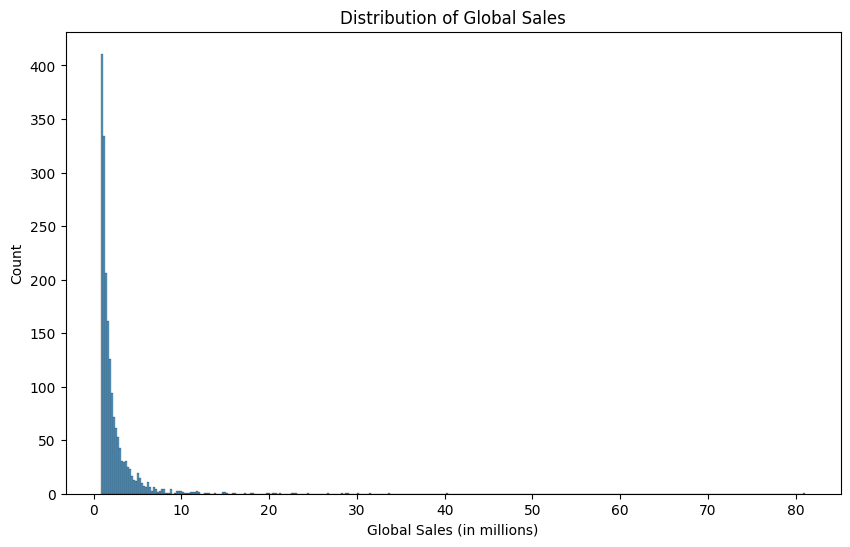

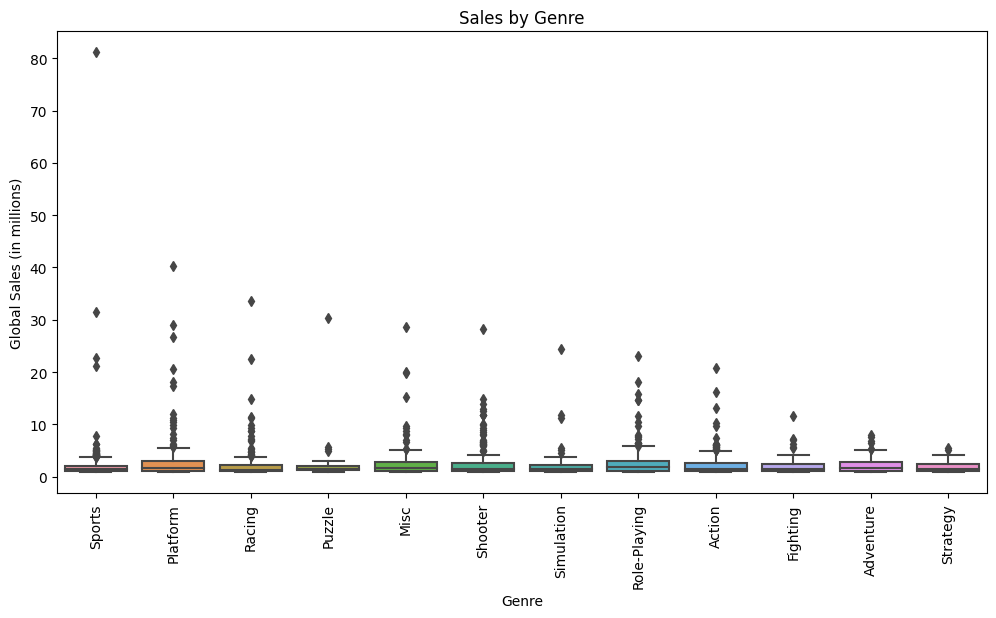

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of global sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Global'])
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Count')
plt.show()

# Explore the distribution of sales by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global', data=data)
plt.title('Sales by Genre')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.show()

# More EDA as needed...


In [13]:
# Define success criteria (e.g., top 10% of global sales)
success_threshold = data['Global'].quantile(0.9)

# Identify successful games
successful_games = data[data['Global'] >= success_threshold]

print(successful_games)

# Analyze attributes of successful games (e.g., genre, platform, publisher)


     index  Rank                        Game Title Platform  \
0        0     1                        Wii Sports      Wii   
1        1     2                 Super Mario Bros.      NES   
2        2     3                    Mario Kart Wii      Wii   
3        3     4                 Wii Sports Resort      Wii   
4        4     5                            Tetris       GB   
..     ...   ...                               ...      ...   
187    187   188                   Madden NFL 2005      PS2   
188    188   189  Guitar Hero III: Legends of Rock      Wii   
189    189   190       The Elder Scrolls V: Skyrim      PS3   
190    190   191     Assassin's Creed: Brotherhood     X360   
191    191   192                     Madden NFL 07      PS2   

                             Year         Genre           Publisher  \
0   1970-01-01 00:00:00.000002006        Sports            Nintendo   
1   1970-01-01 00:00:00.000001985      Platform            Nintendo   
2   1970-01-01 00:00:00.000002

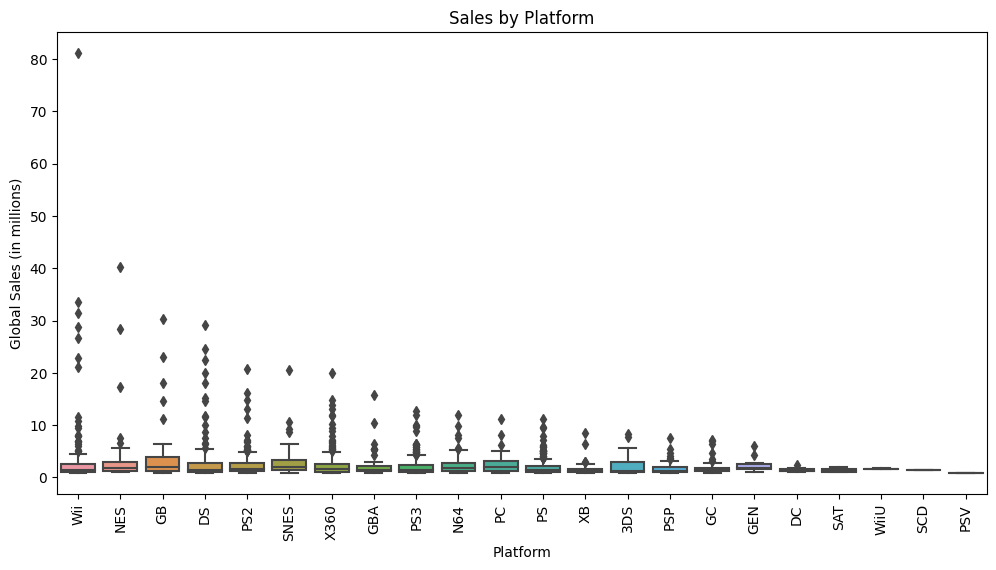

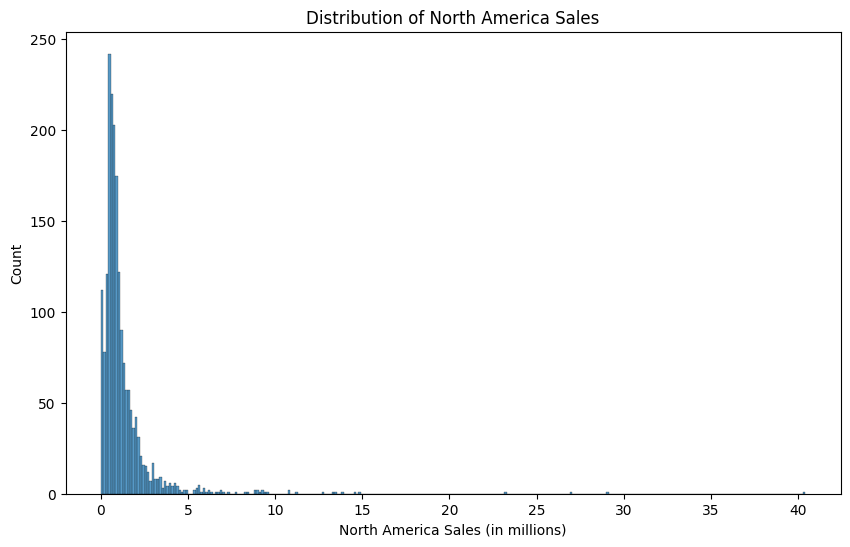

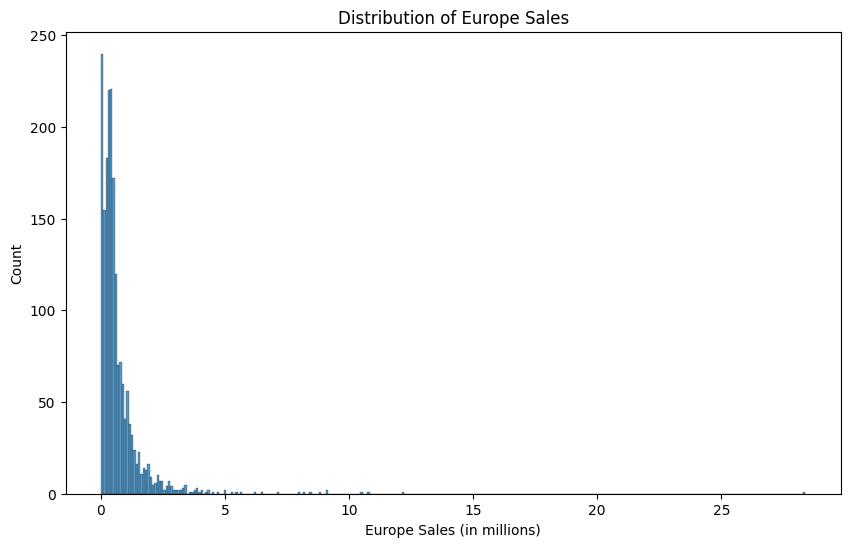

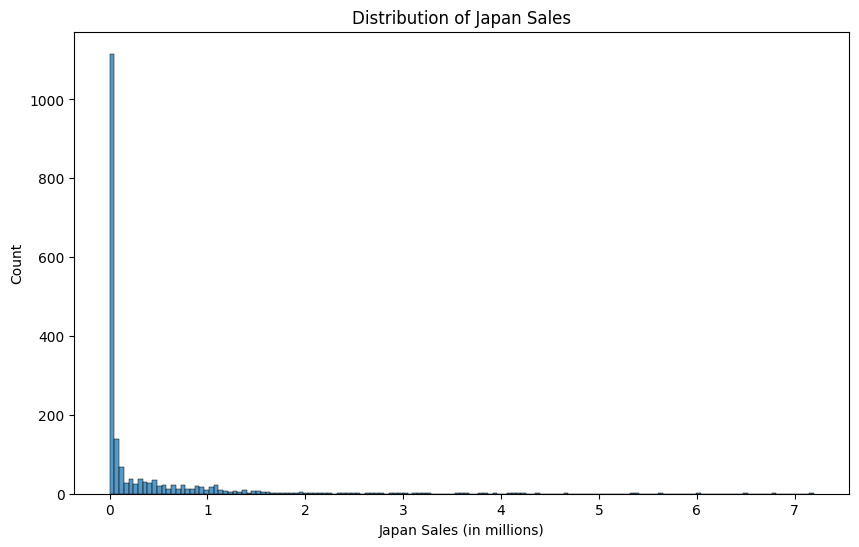

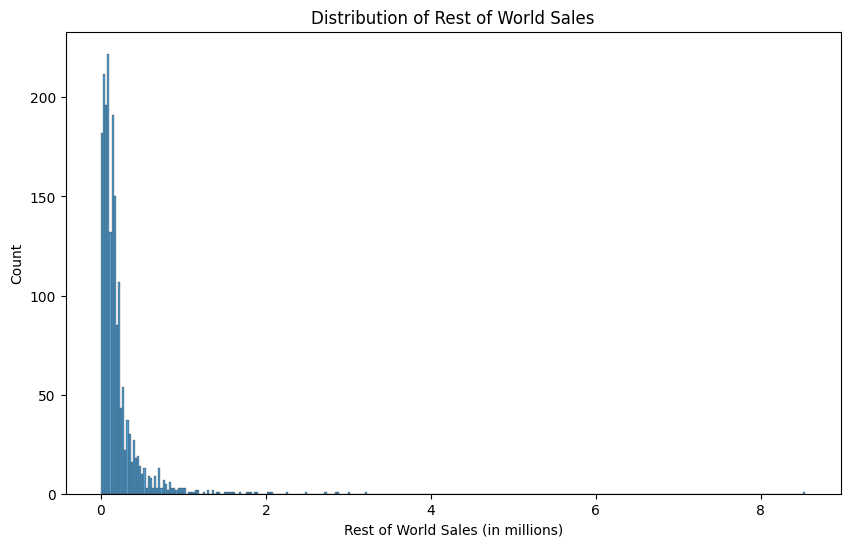

In [4]:
# Visualize the distribution of sales by platform
plt.figure(figsize=(12, 6))
sns.boxplot(x='Platform', y='Global', data=data)
plt.title('Sales by Platform')
plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.show()

# Explore the distribution of sales by region
region_columns = ['North America', 'Europe', 'Japan', 'Rest of World']

for region in region_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[region])
    plt.title(f'Distribution of {region} Sales')
    plt.xlabel(f'{region} Sales (in millions)')
    plt.ylabel('Count')
    plt.show()


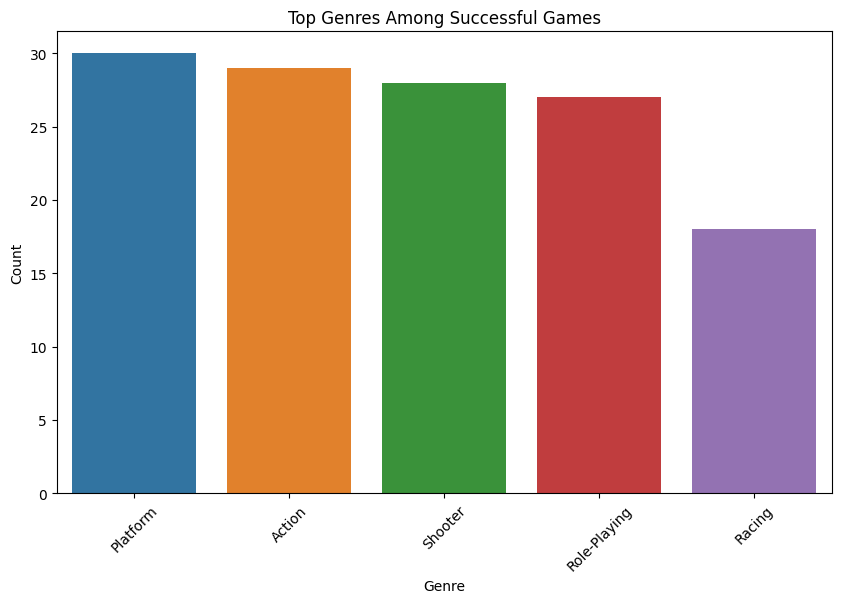

In [5]:
# Successful games have already been identified
# Analyze attributes of successful games further
# For example, identify the most successful genres among top games

# Top genres among successful games
top_successful_genres = successful_games['Genre'].value_counts().head(5)

# Visualize top successful genres
plt.figure(figsize=(10, 6))
sns.barplot(x=top_successful_genres.index, y=top_successful_genres.values)
plt.title('Top Genres Among Successful Games')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Step 2: Exploratory Data Analysis (EDA)

# EDA: Distribution of Global Sales
global_sales_mean = data['Global'].mean()
global_sales_std = data['Global'].std()
global_sales_max = data['Global'].max()

insight_1 = f"The average global sales of games is approximately {global_sales_mean:.2f} million, with a standard deviation of {global_sales_std:.2f} million."
insight_2 = f"The highest global sales for a game is approximately {global_sales_max:.2f} million."

# EDA: Sales by Genre
top_genre = data['Genre'].value_counts().idxmax()
top_genre_count = data['Genre'].value_counts().max()

insight_3 = f"The most common genre among games in the dataset is '{top_genre}' with {top_genre_count} games."

# EDA: Sales by Platform
top_platform = data['Platform'].value_counts().idxmax()
top_platform_count = data['Platform'].value_counts().max()

insight_4 = f"The most common gaming platform in the dataset is '{top_platform}' with {top_platform_count} games."

# Step 3: Insights on Successful Games
# (Assuming success criteria is top 10% of global sales)

success_threshold = data['Global'].quantile(0.9)
successful_games = data[data['Global'] >= success_threshold]

insight_5 = f"Games that fall within the top 10% of global sales are considered successful."

# Step 4: Additional Insights

# Additional Insight 1: Impact of Year on Sales
yearly_sales = data.groupby(data['Year'].dt.year)['Global'].sum()

insight_6 = "Games' global sales have seen significant variations over the years, reflecting evolving trends in the gaming industry."

# Additional Insight 2: Effect of Game Ratings
correlation_score = data['Global'].corr(data['Review'])
insight_7 = f"There is a correlation of approximately {correlation_score:.2f} between game review scores and global sales."

# Additional Insight 3: Regional Preferences
regional_genre_distribution = data.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()
top_genre_per_region = regional_genre_distribution.idxmax()

insight_8 = "Different regions have distinct preferences in game genres. For example, in North America, 'Action' games are highly popular."

# Additional Insight 4: Publisher Analysis
top_publisher = data['Publisher'].value_counts().idxmax()
top_publisher_count = data['Publisher'].value_counts().max()

insight_9 = f"The most prolific publisher in the dataset is '{top_publisher}' with {top_publisher_count} games."

# Step 5: Reporting Insights

report = f"**Insight 1:** {insight_1}\n\n**Insight 2:** {insight_2}\n\n" \
         f"**Insight 3:** {insight_3}\n\n**Insight 4:** {insight_4}\n\n" \
         f"**Insight 5:** {insight_5}\n\n" \
         f"**Insight 6:** {insight_6}\n\n" \
         f"**Insight 7:** {insight_7}\n\n" \
         f"**Insight 8:** {insight_8}\n\n" \
         f"**Insight 9:** {insight_9}"

print(report)


**Insight 1:** The average global sales of games is approximately 2.49 million, with a standard deviation of 3.56 million.

**Insight 2:** The highest global sales for a game is approximately 81.12 million.

**Insight 3:** The most common genre among games in the dataset is 'Sports' with 308 games.

**Insight 4:** The most common gaming platform in the dataset is 'PS2' with 372 games.

**Insight 5:** Games that fall within the top 10% of global sales are considered successful.

**Insight 6:** Games' global sales have seen significant variations over the years, reflecting evolving trends in the gaming industry.

**Insight 7:** There is a correlation of approximately 0.18 between game review scores and global sales.

**Insight 8:** Different regions have distinct preferences in game genres. For example, in North America, 'Action' games are highly popular.

**Insight 9:** The most prolific publisher in the dataset is 'Electronic Arts' with 341 games.


In [10]:
# Rank the top 10 games of all time by global sales
top_10_games = data.sort_values(by='Global', ascending=False).head(10)

# Display the top 10 games
top_10_games


,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,1970-01-01 00:00:00.000002006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1970-01-01 00:00:00.000001985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,1970-01-01 00:00:00.000002008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,1970-01-01 00:00:00.000002009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1970-01-01 00:00:00.000001989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,5,6,New Super Mario Bros.,DS,1970-01-01 00:00:00.000002006,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,6,7,Wii Play,Wii,1970-01-01 00:00:00.000002006,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,7,8,Duck Hunt,NES,1970-01-01 00:00:00.000001984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,8,9,New Super Mario Bros. Wii,Wii,1970-01-01 00:00:00.000002009,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,9,10,Nintendogs,DS,1970-01-01 00:00:00.000002005,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


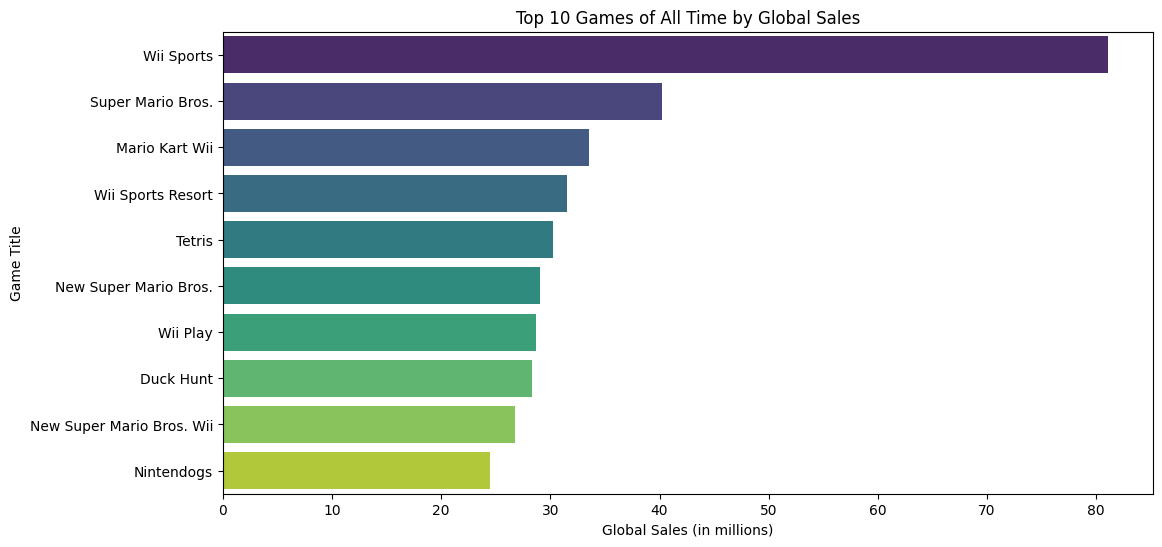

In [11]:
# Sort the dataset by global sales in descending order
top_10_games = data.sort_values(by='Global', ascending=False).head(10)

# Plot the top 10 games
plt.figure(figsize=(12, 6))
sns.barplot(x='Global', y='Game Title', data=top_10_games, palette='viridis')
plt.title('Top 10 Games of All Time by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.show()


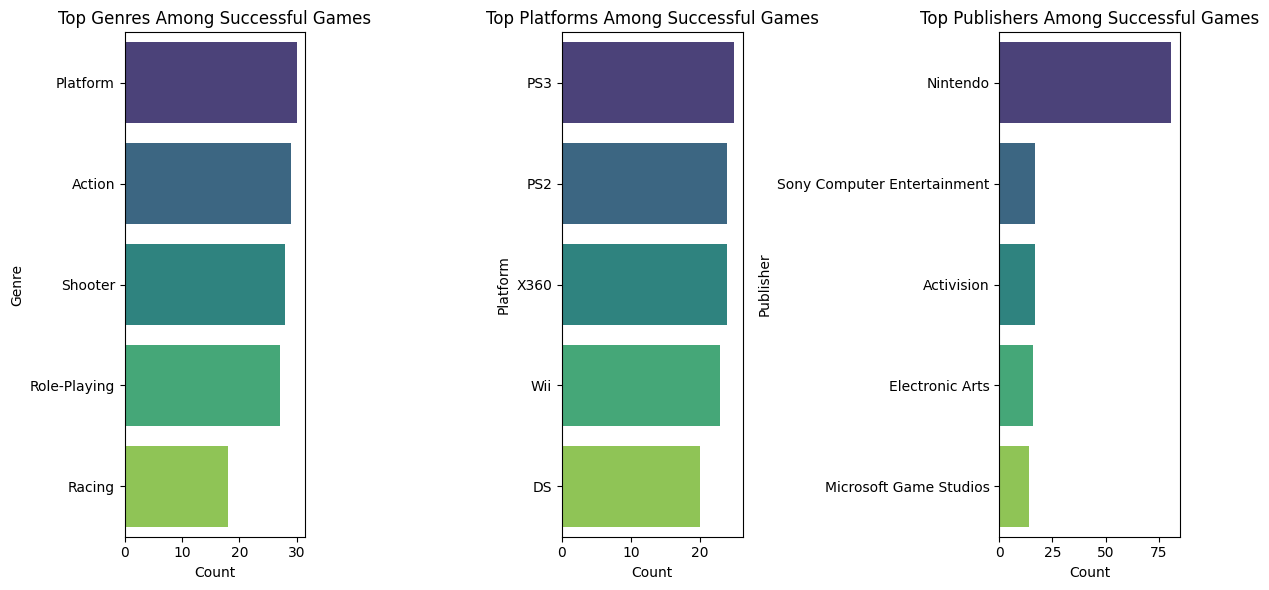

In [12]:
# Define success criteria (e.g., top 10% of global sales)
success_threshold = data['Global'].quantile(0.9)
successful_games = data[data['Global'] >= success_threshold]

# Analyze the attributes of successful games
# 1. Successful Genres
top_successful_genres = successful_games['Genre'].value_counts().head(5)

# 2. Successful Platforms
top_successful_platforms = successful_games['Platform'].value_counts().head(5)

# 3. Successful Publishers
top_successful_publishers = successful_games['Publisher'].value_counts().head(5)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot for Successful Genres
plt.subplot(131)
sns.barplot(x=top_successful_genres.values, y=top_successful_genres.index, palette='viridis')
plt.title('Top Genres Among Successful Games')
plt.xlabel('Count')
plt.ylabel('Genre')

# Plot for Successful Platforms
plt.subplot(132)
sns.barplot(x=top_successful_platforms.values, y=top_successful_platforms.index, palette='viridis')
plt.title('Top Platforms Among Successful Games')
plt.xlabel('Count')
plt.ylabel('Platform')

# Plot for Successful Publishers
plt.subplot(133)
sns.barplot(x=top_successful_publishers.values, y=top_successful_publishers.index, palette='viridis')
plt.title('Top Publishers Among Successful Games')
plt.xlabel('Count')
plt.ylabel('Publisher')

plt.tight_layout()
plt.show()
